In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
img = mpimg.imread('pics/chessboard.png')


In [27]:
def swap_notation(point):
    return chr(point[0]+96)+str(point[1])

MOVE_LIST = [[-2,-1],[-2,1],[2,-1],[2,1],[-1,-2],[-1,2],[1,-2],[1,2]]

def pythag(p1,p2):
    return ((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)**.5

def gen_next_points(point_list : list, visited_points = set()):
    point_set = set()
    for p in point_list:
        temp_list = [(move[0] + p[0], move[1] + p[1]) for move in MOVE_LIST if 0 < move[0] + p[0] < 9 and 0 < move[1] + p[1] < 9 and (move[0] + p[0], move[1] + p[1]) not in visited_points]
        for el in temp_list:
            point_set.add(el)
        # print(point_set)
    return list(point_set)

def solve(matrix, visited_points, end):
    plt.figure()
    plt.scatter(end[0],end[1],color = 'red', s = 50)
    plt.scatter([p[0] for p in matrix],[p[1] for p in matrix])
    plt.xlim(0.5,8.5)
    plt.ylim(0.5,8.5)
    plt.imshow(img, extent=(0.5,8.5,0.5,8.5))
    if not matrix:
        return
    for point in matrix:
        if point == end:
            return 1
        visited_points.add(point)
    new_matrix = [new_p1 for new_p1 in gen_next_points(matrix, visited_points) if new_p1 not in visited_points]
    ans = solve(new_matrix, visited_points, end)
    if isinstance(ans, int):
        return ans + 1

def knight(p1, p2, visited_points = set()):
    # assume that we're never given p1 = p2
    start, end = (ord(p1[0])-96, int(p1[1])), (ord(p2[0])-96, int(p2[1]))
    visited_points.add(start)
    plt.figure()
    plt.scatter(end[0],end[1],color = 'red', s = 50)
    plt.scatter(start[0],start[1])
    plt.xlim(0.5,8.5)
    plt.ylim(0.5,8.5)
    plt.imshow(img, extent=(0.5,8.5,0.5,8.5))
    new_p1_matrix = [new_p1 for new_p1 in gen_next_points([start])]
    return solve(new_p1_matrix, visited_points, end)

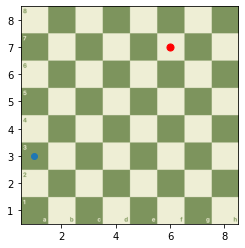

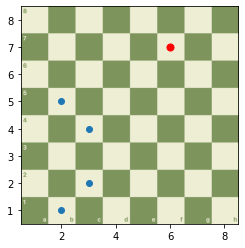

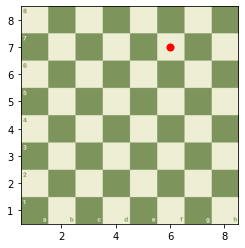

In [31]:
knight("a3","f7")